# La6 : Data Classification (k-Nearest Neighbor)
#### (Lab6_KNN.ipynb)

###### In this lab, you will learn how to perform data classifcation (k-Nearest Neighbor) with Python
The Python packages that were used for writing this notebook are listed below:
1. pandas
2. matplotlib
3. scikit-learn

The steps for data classification included in this lab are:
1. Importing Python packages 
2. Reading a dataset
3. Data Pre-processing: Data Cleaning & Feature Engineering (if needed)
4. Normalization
5. Overall Steps of KNN Classification
6. Model Evaluation
7. KNN: Choosing an optimal k value
8. KNN: Model Creation
9. KNN: Deploying the model

### Problem and Dataset Description

#### Problem: Prediction of Iris plant class for new sample(s)

###### Iris dataset 
The most popular data set for Classification (supervised learning)

150 samples with 4 features: sepal length, sepal width, petal length and petal width (in cm) 

3 class: Iris Setosa (50 samples), Iris Versicolour (50 samples), Iris Virginica (50 samples)

Reference: https://archive.ics.uci.edu/ml/datasets/iris

### 1. Importing Python packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### 2. Reading a dataset

In [3]:
df = pd.read_csv('iris.csv')

### 3. Data Exploration and Data Pre-processing

#### 3.1 Basic Exploration

In [4]:
# Display how many rows and columns
df.shape

(150, 5)

In [5]:
# Display the first 5 rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Display data types of each column
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
# Finding missing values for each feature:
df.isnull().sum()

# Percentages of missing values for each feature
#df.isnull().sum()/len(df)*100

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
# Finding missing values for each sample:
#df.isnull().sum(axis=1)
df.isnull().sum(axis=1).sum()

#Percentages of missing values for each sample:
#df.isnull().sum(axis=1)/len(df.columns)*100

0

#### 3.2 Defining Features (X) and Class (Y)

In [9]:
# Defining data features using column names
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# ======= Alternatives ======= #
# Defining data features using column positions
#X = df.iloc[:,0:4] 

In [10]:
# Defining class using column position (Last Column)
Y = df.iloc[:,-1]  # -1 is for the last column

# ======= Alternatives ======= #
#Y = df.iloc[:,4]  # Defining class using column position
#Y = df[['species']] # Defining class using column name

#### 3.3 Normalization
Standardize the features uisng the StandardScaler class from scikit-learn's preprocessing module.

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

### 5. Overall Steps of KNN Classification
Use scikit-learn 4-step modeling pattern.

In [12]:
#Step 1: Import the sklearn class
#Import "KNeighborsClassifier"
from sklearn.neighbors import KNeighborsClassifier

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=1 and use Euclidean distance metric 
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')

#Step 3: Fit the model with data (i.e., "model training")
#Model is learning the relationship between data (X) and class(Y)
knn.fit(X, Y)

#Step 4: Predict the class label(s) for new data instance(s)
#Use the information it learned during the model training process
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]  # (4.1) define/import 2 new instances
X_new = sc.transform(X_new) # (4.2) normalize them using the normalization model created previously (sc is StandardScaler)
knn.predict(X_new) # (4.3) predict their class lables

array(['setosa', 'versicolor'], dtype=object)

### 6.  Model Evaluation

#### 6.1 Train and Test on the Entire Dataset

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 1
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')

# Fit the model to the whole dataset
knn.fit(X, Y)

# Predict classes of training set
y_pred = knn.predict(X)

# Evaluate model performace
ac = metrics.accuracy_score(Y, y_pred)
print('Training Accuracy: ', ac)
print('Training Classification Error: ', 1-ac)
print('Confusion matrix:')
print(metrics.confusion_matrix(Y, y_pred))

Training Accuracy:  1.0
Training Classification Error:  0.0
Confusion matrix:
[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


#### 6.2 Splitting Training-Test Data

###### 6.2.1 Random Splitting

In [14]:
# Import module from sklean to split data onto training and test sets
from sklearn.model_selection import train_test_split

# Split training set and test set with ration 80% : 20% by specify test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)#, random_state = 0)

# Print the shape of trainning and test sets
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (120, 4)
y_train shape:  (120,)
x_test shape:  (30, 4)
y_test shape:  (30,)


In [15]:
Y.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [16]:
y_train.value_counts()

versicolor    44
setosa        40
virginica     36
Name: species, dtype: int64

In [17]:
y_test.value_counts()

virginica     14
setosa        10
versicolor     6
Name: species, dtype: int64

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 1
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')

# Fit the model to the training set
knn.fit(x_train, y_train)

# Predict classes of the test set
y_pred = knn.predict(x_test)

# Evaluate model performace
ac = metrics.accuracy_score(y_test, y_pred)
print('Tesing Accuracy: ', ac)
print('Tesing Classification Error: ', 1-ac)
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred))

Tesing Accuracy:  0.9
Tesing Classification Error:  0.09999999999999998
Confusion matrix:
[[10  0  0]
 [ 0  5  1]
 [ 0  2 12]]


###### 6.2.1 Stratified Splitting

In [19]:
# Split training set and test set with ration 80% : 20% by specify test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y)#, random_state = 0)

# print the shape of trainning and test sets
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (120, 4)
y_train shape:  (120,)
x_test shape:  (30, 4)
y_test shape:  (30,)


In [20]:
y_train.value_counts()

versicolor    40
setosa        40
virginica     40
Name: species, dtype: int64

In [21]:
y_test.value_counts()

setosa        10
virginica     10
versicolor    10
Name: species, dtype: int64

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 1
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')

# Fit the model to the training set
knn.fit(x_train, y_train)

# Predict classes of the test set
y_pred = knn.predict(x_test)

# Evaluate model performace
ac = metrics.accuracy_score(y_test, y_pred)
print('Tesing Accuracy: ', ac)
print('Tesing Classification Error: ', 1-ac)
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred))

Tesing Accuracy:  0.9333333333333333
Tesing Classification Error:  0.06666666666666665
Confusion matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


#### 6.3 Stratified k-fold Cross Validation
Using cross_validation module to implement stratified k-fold cross-validation.

In [23]:
#Step 1: Import the sklearn classes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=1 
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean') 

#Step 3: Fit and test the model with cross validation (5-fold)
cv_results = cross_validate(knn, X,Y, cv=5, return_train_score=True)
cv_results

{'fit_time': array([0.00099277, 0.00099516, 0.00099754, 0.00099754, 0.0009973 ]),
 'score_time': array([0.00199509, 0.00199342, 0.0009973 , 0.00299859, 0.00199628]),
 'test_score': array([0.93333333, 0.96666667, 0.93333333, 0.9       , 1.        ]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [24]:
# Accuracy score for each fold 
print('Tesing Accuracy for each fold:', cv_results['test_score'])

# Overall accuracy score for cross validaiton 
print('Cross Validation Accuracy: %.3f +/- %.3f' % (cv_results['test_score'].mean(), cv_results['test_score'].std()))

Tesing Accuracy for each fold: [0.93333333 0.96666667 0.93333333 0.9        1.        ]
Cross Validation Accuracy: 0.947 +/- 0.034


### 7. KNN: Choosing an optimal k value
Using 10-fold cross validation can help to pick a good k value for KNN Create a for loop that trains various KNN models on the whole dataset with different k values, then keep track of the accuracy for each of these models with a list.

In [25]:
# Experimenting with different k values
from sklearn import metrics
k_range = list(range(1,50))
scores_cv = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv_results = cross_validate(knn, X,Y, cv=10) # compute CV accuracy
    scores_cv.append(cv_results['test_score'].mean())
    print(k, cv_results['test_score'].mean())

1 0.9533333333333334
2 0.9533333333333334
3 0.9533333333333334
4 0.9466666666666667
5 0.9533333333333334
6 0.9666666666666666
7 0.9533333333333334
8 0.9666666666666668
9 0.9533333333333334
10 0.96
11 0.9466666666666667
12 0.9466666666666667
13 0.9533333333333334
14 0.96
15 0.96
16 0.9666666666666666
17 0.9466666666666667
18 0.9533333333333334
19 0.9400000000000001
20 0.9466666666666667
21 0.9400000000000001
22 0.9533333333333334
23 0.9466666666666667
24 0.9466666666666667
25 0.9466666666666667
26 0.9466666666666667
27 0.9466666666666667
28 0.9466666666666667
29 0.9466666666666667
30 0.9400000000000001
31 0.9466666666666667
32 0.9400000000000001
33 0.9333333333333333
34 0.9133333333333333
35 0.9133333333333333
36 0.9
37 0.9066666666666666
38 0.9
39 0.9
40 0.8866666666666667
41 0.8933333333333333
42 0.8933333333333333
43 0.8933333333333333
44 0.8866666666666667
45 0.8933333333333333
46 0.8800000000000001
47 0.8800000000000001
48 0.8800000000000001
49 0.8733333333333334


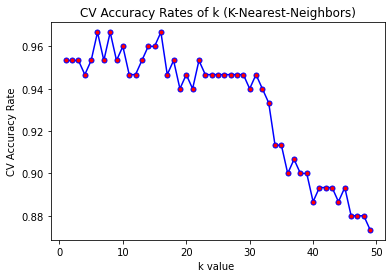

In [26]:
# create a line graph for testing accuracy
import matplotlib.pyplot as plt
plt.plot(k_range, scores_cv, 'y', color='blue',marker='o', markerfacecolor='red', markersize='5')
plt.xlabel('k value ')
plt.ylabel('CV Accuracy Rate')
plt.title('CV Accuracy Rates of k (K-Nearest-Neighbors)')
plt.show()

In [27]:
# find best k with the highest cv accuracy
import operator
index, value = max(enumerate(scores_cv), key=operator.itemgetter(1))
print('best k = ', index, 'accuracy = ', value)

best k =  7 accuracy =  0.9666666666666668


### 8. KNN: Model Creation
Creating KNN model from the entrie data set, with the best k found in the previous step.

In [28]:
#Step 1: Import the sklearn class
from sklearn.neighbors import KNeighborsClassifier

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=7 (best k) 
best_knn = KNeighborsClassifier(n_neighbors=7, metric = 'euclidean') 

#Step 3: Fit the model with data (model training)
#Model is learning the relationship between data (X) and class(Y)
best_knn.fit(X,Y)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

### 9. KNN: Deploying the model 
Use the created model to predict class label(s) for new data instance(s)

In [29]:
# Predict the class label for new record(s)
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]  # (1) define/read 2 new instances
X_new = sc.transform(X_new) # (2) normalize them using the normalization model created previously (sc is StandardScaler)
best_knn.predict(X_new) # (3) predict their class lables

array(['setosa', 'setosa'], dtype=object)

# The END^^